In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

from utils import preprocess_data

In [164]:
old_results = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/hunting_analysis/final_results/cross_val_results_all_metrics.csv')
new_results = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/cross_val_results_all_metrics.csv')

In [174]:
block = 'spatial'
old_results[(old_results['block_type'] == block) & (old_results['model_name'].str.startswith('dummy')) & (~old_results['metric'].str.contains('mean'))]

,metric,mean,standard_deviation,model_name,dataset,date,num_folds,block_type,spatial_spacing,group_col
16,balanced_accuracy_DI-0.05,0.250000,0.000000,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:21,5,spatial,5.0,NaN
19,median_absolute_error-inf,0.400595,0.127273,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:21,5,spatial,5.0,NaN
20,median_absolute_error-1,0.271204,0.142025,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:21,5,spatial,5.0,NaN
22,median_absolute_percentage_error-0,0.432534,0.127029,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:21,5,spatial,5.0,NaN
23,wasserstein_distance-2,0.395794,0.040676,dummy_regressor_median,mammals_recreated,2025-04-09 17:45:21,5,spatial,5.0,NaN


In [175]:
d = new_results[(new_results['block_type'] == block) & (new_results['model_name'].str.contains('rf-pca')) & (~new_results['metric'].str.contains('mean'))]
d.sort_values('metric')

,metric,mean,standard_deviation,model_name,dataset,date,num_folds,block_type,spatial_spacing,group_col
80,balanced_accuracy_DI-0.05,0.289212,0.009382,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
88,balanced_accuracy_local_extirpation,0.572737,0.047732,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
84,median_absolute_error-1,0.310062,0.014724,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
83,median_absolute_error-inf,0.383678,0.024808,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
86,median_absolute_percentage_error-0,0.535165,0.063672,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
87,wasserstein_distance-2,0.181772,0.063357,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
89,wasserstein_distance_continuous-2,0.217733,0.040556,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN


In [177]:
d = new_results[(new_results['block_type'] == block) & (new_results['model_name'].str.contains('xgboost_three_part')) & (~new_results['metric'].str.contains('mean'))]
d.sort_values('metric')

,metric,mean,standard_deviation,model_name,dataset,date,num_folds,block_type,spatial_spacing,group_col
184,balanced_accuracy_DI-0.05,0.322339,0.047833,xgboost_three_part_2.0mins,mammals_recreated,2025-09-26 17:06:14,5,spatial,5.0,NaN
208,balanced_accuracy_DI-0.05,0.322437,0.040450,xgboost_three_part_2.0mins_rebalance-classes,mammals_recreated,2025-09-26 15:44:52,5,spatial,5.0,NaN
188,median_absolute_error-1,0.339329,0.072202,xgboost_three_part_2.0mins,mammals_recreated,2025-09-26 17:06:14,5,spatial,5.0,NaN
212,median_absolute_error-1,0.408546,0.061015,xgboost_three_part_2.0mins_rebalance-classes,mammals_recreated,2025-09-26 15:44:52,5,spatial,5.0,NaN
187,median_absolute_error-inf,0.437980,0.079957,xgboost_three_part_2.0mins,mammals_recreated,2025-09-26 17:06:14,5,spatial,5.0,NaN
211,median_absolute_error-inf,0.513317,0.073319,xgboost_three_part_2.0mins_rebalance-classes,mammals_recreated,2025-09-26 15:44:52,5,spatial,5.0,NaN
190,median_absolute_percentage_error-0,0.559751,0.100395,xgboost_three_part_2.0mins,mammals_recreated,2025-09-26 17:06:14,5,spatial,5.0,NaN
214,median_absolute_percentage_error-0,0.669829,0.025195,xgboost_three_part_2.0mins_rebalance-classes,mammals_recreated,2025-09-26 15:44:52,5,spatial,5.0,NaN
191,wasserstein_distance-2,0.151623,0.026691,xgboost_three_part_2.0mins,mammals_recreated,2025-09-26 17:06:14,5,spatial,5.0,NaN
215,wasserstein_distance-2,0.133426,0.073053,xgboost_three_part_2.0mins_rebalance-classes,mammals_recreated,2025-09-26 15:44:52,5,spatial,5.0,NaN


In [17]:
old_tropical_mammals = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/tropical_species/tropical_mammals_taxonomic_info_w_body_mass.csv')
new_tropical_mammals = pd.read_csv('/Users/emiliolr/Desktop/phd-exploratory-work/results/tropical_species/tropical_mammals_taxonomic_info_w_body_mass.csv')

In [32]:
o = old_tropical_mammals[old_tropical_mammals['is_species']]['iucn_id'].to_list()
n = new_tropical_mammals[new_tropical_mammals['is_species']]['iucn_id'].to_list()

v1 = len(set(o) - set(n))
print('IDs in old but not new:', v1)

v2 = len(set(n) - set(o))
print('IDs in new but not old:', v2)

v3 = len(set(n).intersection(set(o)))
print('IDs shared:', v3)

IDs in old but not new: 15
IDs in new but not old: 75
IDs shared: 3214


In [39]:
old_tropical_mammals[~old_tropical_mammals['iucn_id'].isin(n)]

,iucn_id,scientific_name,class,order,family,synonyms,is_species,combine_match_species,combine_body_mass,combine_bm_match_level
390,135429,saguinus melanoleucus,mammalia,primates,callitrichidae,NaN,True,NaN,495.665,genus
894,14258,mysateles prehensilis,mammalia,rodentia,capromyidae,NaN,True,mysateles prehensilis,1591.600,species
955,14941,nycticebus pygmaeus,mammalia,primates,lorisidae,nycticebus intermedius,True,nycticebus pygmaeus,907.525,species
1228,174391079,erythrocebus patas,mammalia,primates,cercopithecidae,simia patas,True,erythrocebus patas,7660.500,species
1390,19345,rattus marmosurus,mammalia,rodentia,muridae,NaN,True,rattus marmosurus,217.000,species
1495,19758,stenonycteris lanosa,mammalia,chiroptera,pteropodidae,rousettus lanosus,True,rousettus lanosus,103.000,species
1825,2768,berylmys bowersi,mammalia,rodentia,muridae,NaN,True,berylmys bowersi,358.680,species
1859,3036,bradypus torquatus,mammalia,pilosa,bradypodidae,NaN,True,bradypus torquatus,4184.210,species
1878,3415,cabassous unicinctus,mammalia,cingulata,chlamyphoridae,NaN,True,cabassous unicinctus,3987.970,species
1879,3416,cacajao calvus,mammalia,primates,pitheciidae,NaN,True,cacajao calvus,3421.040,species


In [40]:
o = old_tropical_mammals[old_tropical_mammals['combine_bm_match_level'] == 'species']
o = o[['iucn_id', 'combine_body_mass']]
o = o.rename(columns = {'combine_body_mass' : 'old_bm'})

n = new_tropical_mammals[new_tropical_mammals['combine_bm_match_level'] == 'species']
n = n[['iucn_id', 'combine_body_mass']]
n = n.rename(columns = {'combine_body_mass' : 'new_bm'})

m = pd.merge(o, n, how = 'left', on = 'iucn_id')
cond = ((m['old_bm'] != m['new_bm']) & (~m['new_bm'].isna())).sum()
print('Different body mass for species matches (not NA):', cond)

Different body mass for species matches (not NA): 0


In [11]:
old_effective_aoh = pd.read_csv('/Users/emiliolr/Desktop/hunting_results/effective_aoh_info_rf.csv')
old_effective_aoh.columns = [f'{c}_old' for c in old_effective_aoh.columns]

new_effective_aoh = pd.read_csv('/Users/emiliolr/Desktop/effective_aoh_info_rf-pca.csv')
new_effective_aoh.columns = [f'{c}_new' for c in new_effective_aoh.columns]

In [26]:
eff_aoh_match = pd.merge(old_effective_aoh, new_effective_aoh, how = 'left', left_on = 'species_old', right_on = 'species_new')

v1 = (eff_aoh_match['human_absent_aoh_total_new'] - eff_aoh_match['human_absent_aoh_total_old']) / eff_aoh_match['human_absent_aoh_total_old']
print(f'{round(v1.median() * 100, 2)}% median increase in human-absent AOH')

v2 = (eff_aoh_match['current_aoh_total_new'] - eff_aoh_match['current_aoh_total_old']) / eff_aoh_match['current_aoh_total_old']
print(f'{round(v2.median() * 100, 2)}% median increase in current AOH')

1533.05% median increase in human-absent AOH
2396.64% median increase in current AOH


In [36]:
(eff_aoh_match['human_absent_aoh_total_new'] / eff_aoh_match['human_absent_aoh_total_old']).median()

16.330458328749817

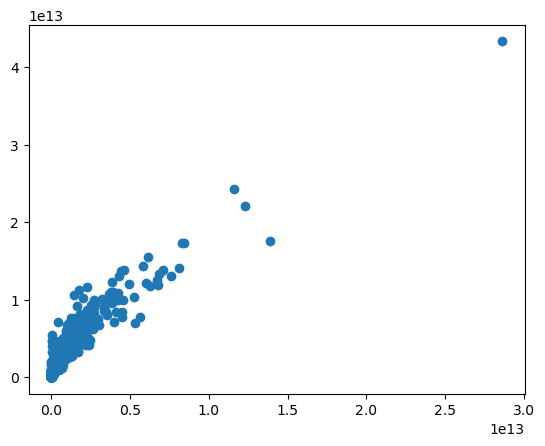

In [29]:
plt.scatter(eff_aoh_match['current_aoh_total_old'], eff_aoh_match['current_aoh_total_new'])

In [27]:
v3_old = (eff_aoh_match['current_aoh_total_old'] - eff_aoh_match['human_absent_aoh_total_old']) / eff_aoh_match['human_absent_aoh_total_old']
v3_new = (eff_aoh_match['current_aoh_total_new'] - eff_aoh_match['human_absent_aoh_total_new']) / eff_aoh_match['human_absent_aoh_total_new']

print(f'{round(v3_old.abs().median() * 100, 2)}% median decrease in AOH due to land-cover change (OLD)')
print(f'{round(v3_new.abs().median() * 100, 2)}% median decrease in AOH due to land-cover change (NEW)')

44.14% median decrease in AOH due to land-cover change (OLD)
23.81% median decrease in AOH due to land-cover change (NEW)


In [38]:
old_recreated = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended.csv')
new_recreated = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended_w_pca.csv')

In [49]:
new_recreated = new_recreated[list(old_recreated.columns)]
(old_recreated != new_recreated).sum()

Reference                     0
Study                         0
Order                         0
Family                        0
Species                       0
Species_List                  0
Longitude                     0
Latitude                      0
Response_Ratio                0
Region                        0
Country                       0
IUCN_Country_Region           0
Year                          0
GDP_Per_Capita                0
Stunting_Pct                  0
Literacy_Rate                 0
Dist_Settlement_KM            0
Travel_Time_Small             0
Travel_Time_Large             0
Protected_Area                0
Livestock_Biomass             0
Population_Density            0
Forest_Cover                  0
NPP                           0
Road_Density                  0
Percent_Settlement_50km     374
Corruption                    0
Government_Effectiveness      0
Political_Stability           0
Regulation                    0
Rule_of_Law                   0
Accounta

In [52]:
(~np.isclose(old_recreated['Percent_Settlement_50km'], new_recreated['Percent_Settlement_50km'])).sum()

0

In [195]:
import pickle
import sys

sys.path.append('..')

with open('/Users/emiliolr/Desktop/life-hunting/testing_governance/models/xgboost_three_part_10.0mins.pkl', 'rb') as f:
    model = pickle.load(f)

In [199]:
m = model.regressor_increase

for j, k in zip(m.feature_names_in_, m.feature_importances_):
    print(f'{j} - {k}')

Body_Mass - 0.11244107037782669
Stunting_Pct - 0.09363549947738647
Literacy_Rate - 0.11719314754009247
Dist_Settlement_KM - 0.08677469193935394
Travel_Time_Large - 0.06096217408776283
Livestock_Biomass - 0.12618446350097656
Population_Density - 0.09571249037981033
Percent_Settlement_50km - 0.08295382559299469
Protected_Area - 0.0
PC_0 - 0.2241426557302475


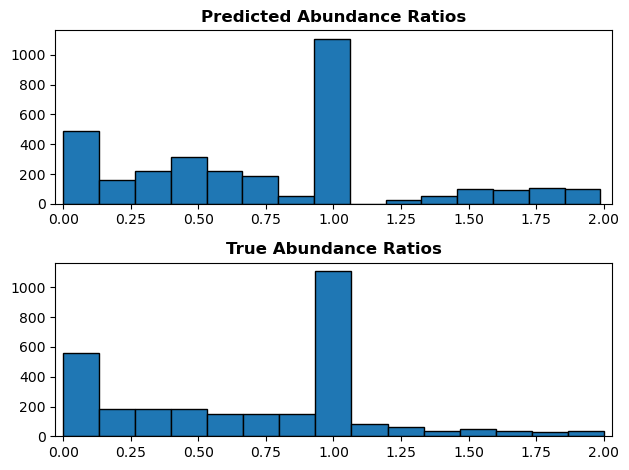

In [222]:
data = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended.csv')

pp_args = {'include_indicators' : True,
           'include_categorical' : False,
           'polynomial_features' : 0,
           'log_trans_cont' : False,
           'dataset' : 'mammals_recreated',
           'pca_cols' : ['Corruption', 'Government_Effectiveness', 'Political_Stability', 'Regulation', 
                         'Rule_of_Law', 'Accountability']}
pp_data = preprocess_data(data, standardize = True, **pp_args)

y_true = data['Response_Ratio']
y_pred = model.predict(pp_data, return_constit_preds = False)

fig, ax = plot_ratio_distribution_comparison(true_ratios = y_true, 
                                             pred_ratios = y_pred,
                                             upper_thresh = 2, 
                                             n_bins = 15)

In [11]:
gov_results = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/cross_val_results_all_metrics.csv')

block = 'spatial'
gov_results[(gov_results['block_type'] == block) & (~gov_results['metric'].str.contains('mean'))].sort_values(by = ['metric', 'model_name'])

,metric,mean,standard_deviation,model_name,dataset,date,num_folds,block_type,spatial_spacing,group_col
20,balanced_accuracy_DI-0.05,0.276421,0.051198,pymer_hurdle_wo_rfx_tune-thresh,mammals_recreated,2025-08-26 16:50:27,5,spatial,5.0,NaN
50,balanced_accuracy_DI-0.05,0.265135,0.009706,rf-gov_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-26 15:48:53,5,spatial,5.0,NaN
80,balanced_accuracy_DI-0.05,0.289212,0.009382,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
110,balanced_accuracy_DI-0.05,0.276474,0.013185,rf_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 14:31:04,5,spatial,5.0,NaN
28,balanced_accuracy_local_extirpation,0.546302,0.077833,pymer_hurdle_wo_rfx_tune-thresh,mammals_recreated,2025-08-26 16:50:27,5,spatial,5.0,NaN
58,balanced_accuracy_local_extirpation,0.538421,0.017287,rf-gov_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-26 15:48:53,5,spatial,5.0,NaN
88,balanced_accuracy_local_extirpation,0.572737,0.047732,rf-pca_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 16:08:44,5,spatial,5.0,NaN
118,balanced_accuracy_local_extirpation,0.555346,0.031719,rf_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-22 14:31:04,5,spatial,5.0,NaN
24,median_absolute_error-1,0.302949,0.057598,pymer_hurdle_wo_rfx_tune-thresh,mammals_recreated,2025-08-26 16:50:27,5,spatial,5.0,NaN
54,median_absolute_error-1,0.302081,0.019670,rf-gov_hurdle_1.0mins_rebalance-classes,mammals_recreated,2025-08-26 15:48:53,5,spatial,5.0,NaN


In [55]:
ben_lop = pd.read_csv('/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended.csv')
m = (ben_lop['Body_Mass'] < 1000)

(ben_lop[m]['Response_Ratio'] >= 1).sum()

242

In [178]:
(ben_lop['Response_Ratio'] == 1).mean()

0.31088082901554404

0.9103931728131667


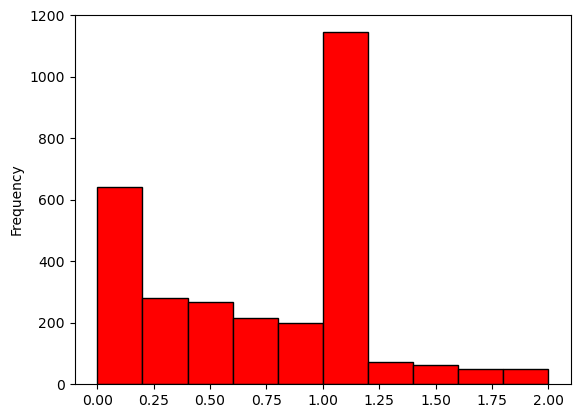

In [81]:
thresh = 2
print((ben_lop['Response_Ratio'] <= thresh).sum() / len(ben_lop))
ben_lop['Response_Ratio'][ben_lop['Response_Ratio'] <= thresh].plot.hist(color = 'red', edgecolor = 'black', bins = 10);

In [86]:
from custom_metrics import get_DI_cats

ben_lop['di_cat'] = get_DI_cats(ben_lop['Response_Ratio'], neighborhood = 0.1)

for s in ben_lop['Study'].value_counts().index.to_list():
    sub = ben_lop[ben_lop['Study'] == s]['di_cat'].value_counts()
    # print(sub)
    # print()

In [132]:
# for s in ben_lop['Study'].value_counts().index.to_list():
#     sub = ben_lop[ben_lop['Study'] == s]['Species'].value_counts()
#     print(sub)
#     print()

lens = []
for s in ben_lop['Species'].value_counts().index.to_list():
    sub = ben_lop[ben_lop['Species'] == s]['Study'].value_counts()
    lens.append(len(sub))

np.median(lens)

2.0

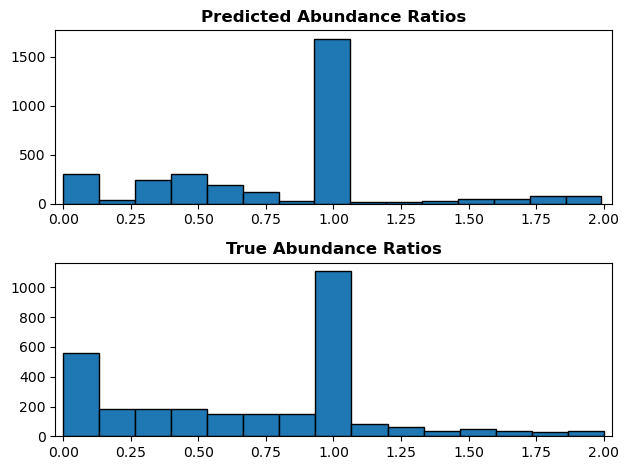

In [160]:
from plotting_utils import plot_ratio_distribution_comparison

raw = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/raw_predictions/xgboost_three_part_2.0mins_mammals_recreated_5-fold_spatial-blocking_5-degree.csv')
# raw = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/raw_predictions/rf-pca_hurdle_1.0mins_rebalance-classes_mammals_recreated_5-fold_random-blocking.csv')

fig, ax = plot_ratio_distribution_comparison(true_ratios = raw['actual'], 
                                             pred_ratios = raw['predicted'],
                                             upper_thresh = 2, 
                                             n_bins = 15)


# m = (raw['actual'] <= 2)
# actual = raw['actual'][m]
# pred = raw['predicted'][m]

# plt.hist(actual, color = 'grey', alpha = 0.6, edgecolor = None)
# plt.hist(pred, color = 'maroon', alpha = 0.6, edgecolor = None)


# plt.show()

In [162]:
k = 0
((raw['actual'] == k) & (raw['predicted'] == k)).sum() / (raw['actual'] == k).sum()

0.17892156862745098

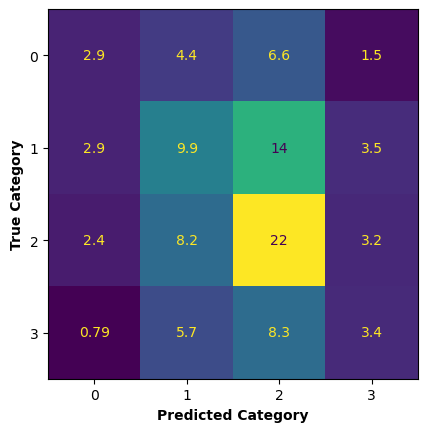

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cat_encoding = {'extirpated' : 0, 'decrease' : 1, 'no change' : 2, 'increase' : 3}
cats = pd.Series(get_DI_cats(raw['actual'], neighborhood = 0.1)).apply(lambda x: cat_encoding[x])

cm = confusion_matrix(cats, raw['predicted_class'], labels = [0, 1, 2, 3])
cm = (cm / len(cats)) * 100
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot(colorbar = False)

plt.ylabel('True Category', weight = 'bold')
plt.xlabel('Predicted Category', weight = 'bold')

plt.show()

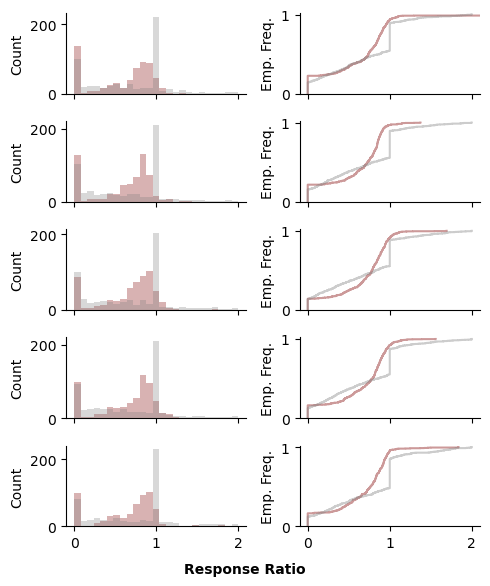

In [107]:
# Looking at histograms/eCDFs of actual/predicted per fold and corresponding Wasserstein distance
max_val = 2
raw_preds = pd.read_csv('/Users/emiliolr/Desktop/life-hunting/testing_governance/raw_predictions/rf-pca_hurdle_1.0mins_rebalance-classes_mammals_recreated_5-fold_random-blocking.csv')
wds = []

fig, axs = plt.subplots(5, 2, figsize = (5, 6), sharex = True)

for fold in range(0, 5):
    d = raw_preds[raw_preds['fold'] == fold]
    d = d[(d['actual'] <= max_val) & (d['actual'] >= 0)]

    #  histogram
    sns.histplot(data = d, x = 'predicted', stat = 'count', kde = False, legend = False, bins = 25, 
                 color = 'maroon', zorder = 100, alpha = 0.3, ec = None, binrange = (0, max_val), ax = axs[fold, 0])
    sns.histplot(data = d, x = 'actual', stat = 'count', kde = False, legend = False, bins = 25, 
                 color = 'grey', zorder = 100, alpha = 0.3, ec = None, binrange = (0, max_val), ax = axs[fold, 0])

    axs[fold, 0].spines['top'].set_visible(False)
    axs[fold, 0].spines['right'].set_visible(False)

    axs[fold, 0].set_xlim(-0.1, max_val + 0.1)

    axs[fold, 0].set_ylabel('Count')

    #  eCDF
    axs[fold, 1].ecdf(d['predicted'], color = 'maroon', alpha = 0.4)
    axs[fold, 1].ecdf(d['actual'], color = 'grey', alpha = 0.4)

    axs[fold, 1].spines['top'].set_visible(False)
    axs[fold, 1].spines['right'].set_visible(False)

    axs[fold, 1].set_ylim(0, 1 + 0.02)
    
    axs[fold, 1].set_ylabel('Emp. Freq.')

    #  labeling
    axs[fold, 0].set_xlabel(None)

fig.supxlabel('Response Ratio', y = 0.03, size = 10, weight = "bold")

fig.tight_layout()
plt.show()

In [88]:
from custom_metrics import get_DI_cats

rr_cats = get_DI_cats(raw['actual'], neighborhood = 0)
pd.Series(rr_cats).value_counts() / len(rr_cats)

decrease      0.365133
no change     0.310881
increase      0.199634
extirpated    0.124352
Name: count, dtype: float64

-22.53119130092179


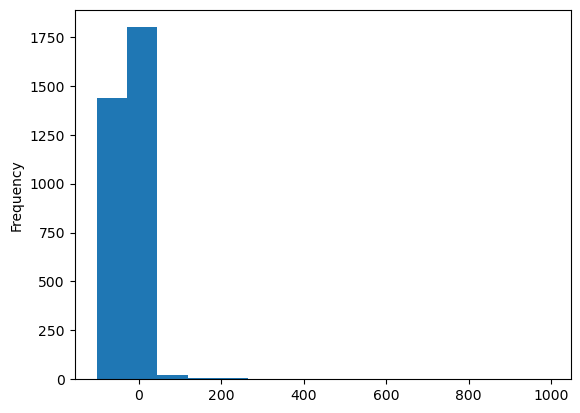

In [138]:
d = pd.read_csv('/Users/emiliolr/Desktop/checking_aoh_diffs.csv')
d = d[d['aoh_hum_abs'] != 0] 

delta = (d['aoh_cur'] - d['aoh_hum_abs']) / d['aoh_hum_abs']
delta = delta[delta < 10] * 100

print(delta.median())

delta.plot.hist(bins = 15)
plt.show()